# Project Overview: Predicting Heart Disease

***by Stevan Koruna and Zachary Crawford***

## Can survey responses from the BRFSS be used to predict heart disease risk?



Heart disease is a chronic disease that affects millions around the world. There are many factors that contribute to the risk of heart disease which can be used to identify those at greater risk for the purposes of taking preventative measures. The development of heart disease is influenced by factors such as plaque buildup in coronary arteries, aging-related molecular changes, chronic inflammation, high blood pressure, and diabetes. As there are known indicators, the importance of preventative measures and tests that can accurately predict heart disease needs to be addressed.

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey conducted annually by the CDC. For this project, we used a CSV file of the BRFSS dataset from 2015, available on Kaggle. The original dataset includes responses from 441,455 individuals and has 330 features. Our dataset contains 253,680 survey responses from the 2015 BRFSS.

This project aims to explore how effectively survey responses from the BRFSS can be used to predict heart disease risk. By using machine learning techniques to analyze and visualize the data, we will identify key risk factors and build a predictive model for heart disease. Visualization of the data will help us understand the relationships of various health indicators with heart disease.

Kaggle link to dataset (dataset was renamed for ease of use): https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

# Set seed
seed = 23
np.random.seed(seed)

# Load dataset
data = pd.read_csv('heart_disease.csv')

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   Diabetes              253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

This table provides a list of the data that were collected.

In [13]:
# Check if missing values
print(data.isnull().sum())

# If any values are missing populate with mean
# This is used as a fail safe to avoid errors.
data.fillna(data.mean(), inplace=True)

# Convert variables to prepare for machine learning algorithms
data = pd.get_dummies(data, drop_first=True)

# Feature scaling as fail safe to make sure the features are equally distributed
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)


HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


This table checks if there are missing values.

### Histogram of BMI

- BMI stands for Body Mass Index. Obesity is a significant factor for heart disease.
 
- The histogram shows the spread of BMI values. The greatest frequency indicates to be around 28.57. 

- This is not to indicate that people with 30+ BMI have a lower risk for heart disease but rather 
nore individuals in the dataset were at that range. 

- If a large portion of the respondents have a high BMI, it suggests that obesity is an issue 
in the population, contributing significantly to the risk of heart disease.


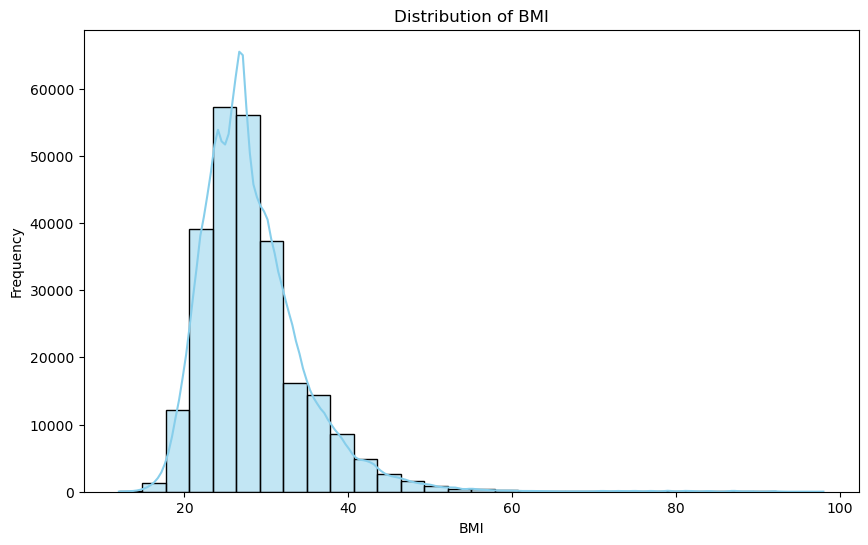

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data['BMI'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()




### Bar Chart of High Cholesterol

- High cholesterol is another critical risk factor for heart disease. 

- This chart shows us the count of individuals with and without high cholesterol.

- This helps us gauge the prevalence of high cholersterol and identify its correlation to heart disease.

- This helps develop a predictive model for heart disease risk.

- The count plot shows there are more individuals without high cholesterol compared to those with high cholesterol in our dataset. 
 

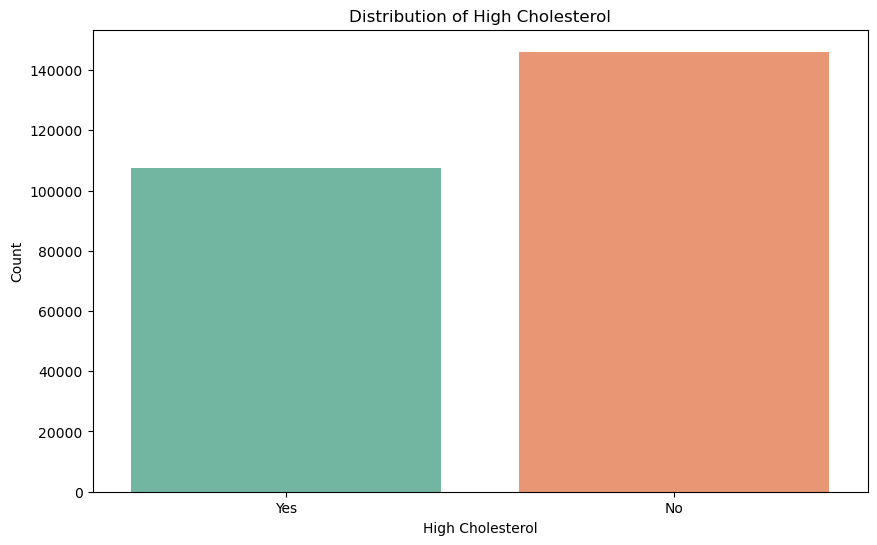

In [20]:
data['HighChol_Visual'] = data['HighChol'].map({0: 'No', 1: 'Yes'})

plt.figure(figsize=(10, 6))
sns.countplot(x='HighChol_Visual', data=data, hue='HighChol_Visual', palette='Set2', legend=False)
plt.title('Distribution of High Cholesterol')
plt.xlabel('High Cholesterol')
plt.ylabel('Count')
plt.show()




## Correlation Matrix Heatmap

The Heatmap shows the correlation between the factors gathered including:

- There's a small positive correlation between high cholesterol and heart disease.

- There's a small positive correlation between BMI and heart disease.

- There's a somewhat medium between poor physical health and poor mental health.

- There's a small positive correlation between age and heart disease.

- There's a medium positive correlation between general health, physical health, and difficulty walking

- There's a medium positive correlation between education and income

- There's a somewhat medium negative correlation between income and general health



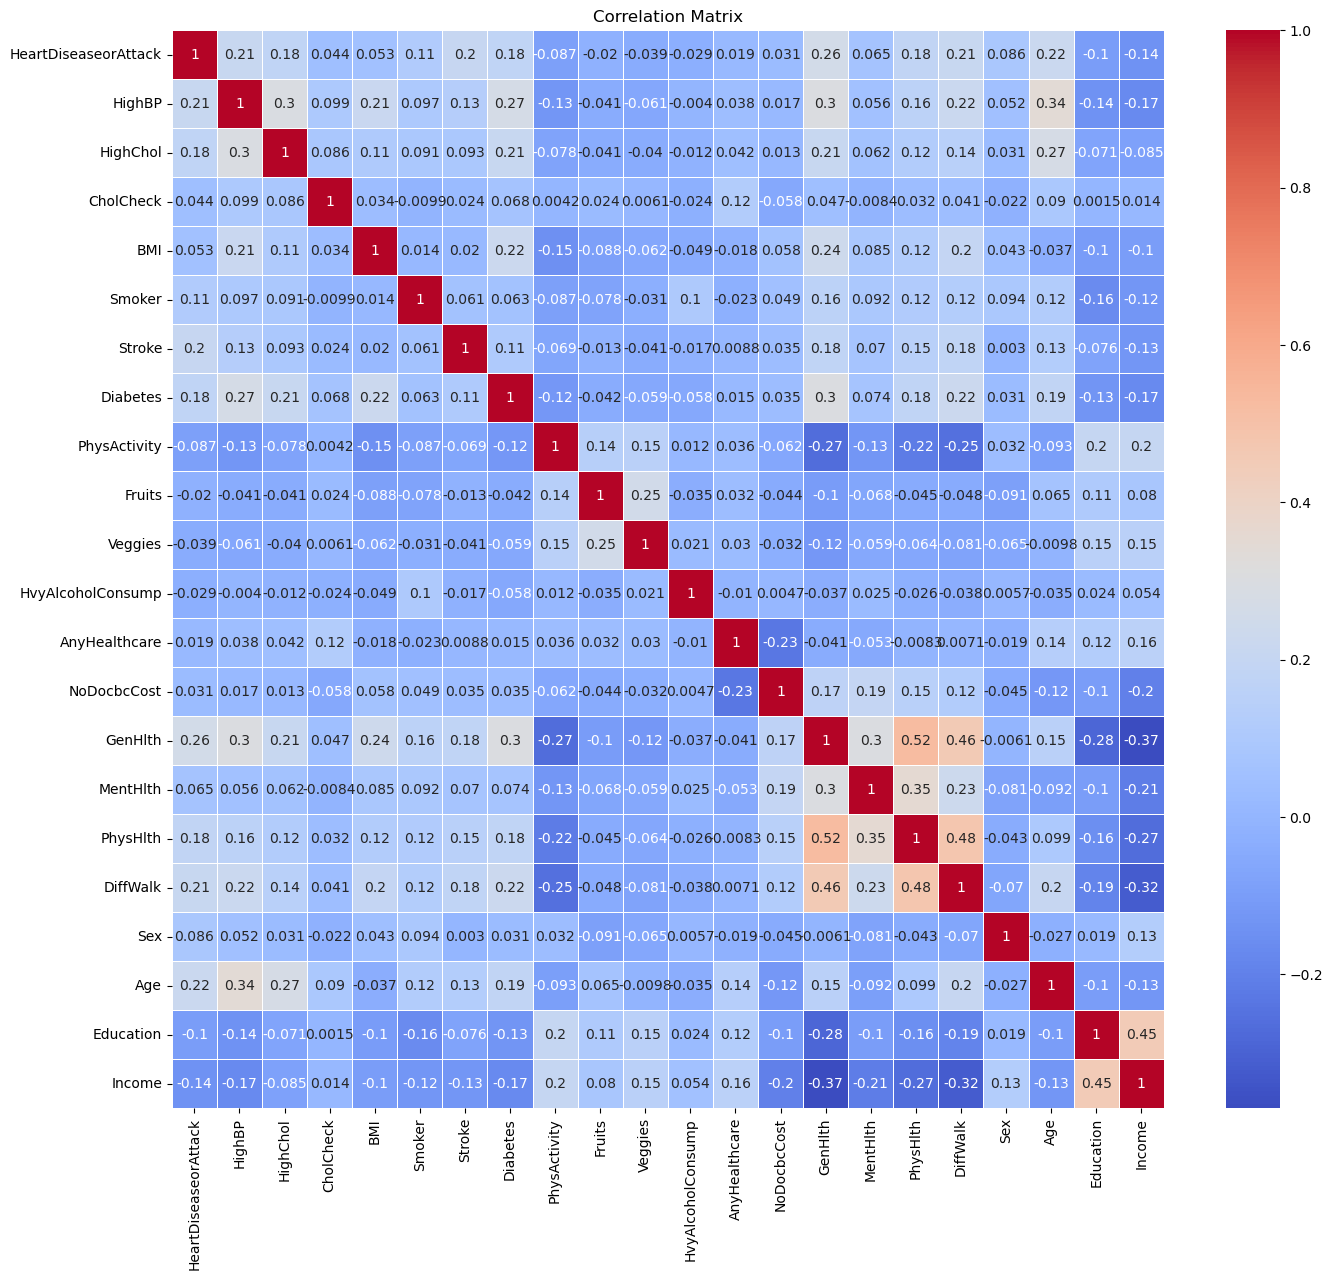

In [23]:
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(16, 14))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()




## Model Building

As this is a classification problem, we chose a logistic regressor as our model. This type of model has also seen use with similar types of medical data.

In [26]:
# Dataset is split into training and testing sets to test the machine learning model.
data = pd.read_csv('heart_disease.csv')
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


General Health, Income, and Physical Health were removed due to their medium correlation with other features

In [29]:
disease = data.HeartDiseaseorAttack
tempfeat = data.drop(columns=['GenHlth', 'Income', 'PhysHlth'])
features = tempfeat.drop(columns=['HeartDiseaseorAttack'])


In [31]:
# Train model
# The dataset has been split into training and testing sets, with 
# 70% of the data used for training and 30% for testing. 

traindata, testdata, trainlabels, testlabels = train_test_split(features, disease, 
                                                                test_size = .3, 
                                                                train_size = .7)

traindata = np.array(traindata)   
testdata = np.array(testdata)
trainlabels = np.array(trainlabels)
testlabels = np.array(testlabels)

model = LogisticRegression(random_state=seed, solver='lbfgs',
                         multi_class='auto',max_iter=1000)
model.fit(traindata, trainlabels)



LogisticRegression(max_iter=1000, random_state=23)

In [32]:
print("Logistic Regression Model Score: ", model.score(testdata, testlabels))


Logistic Regression Model Score:  0.9061153158835278


## Confusion Matrix


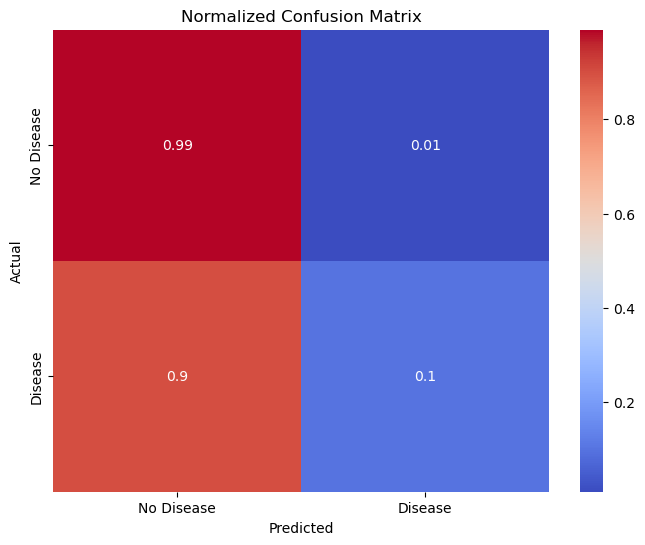

In [36]:
#Evaluate model with Confusion Matrix

numClasses = 2
conf = np.zeros((numClasses, numClasses))
guesses = model.predict(testdata)

# Make sure data are integers
testlabels = testlabels.astype(int)
guesses = guesses.astype(int)

# Get the number of cases for each prediction
for i in range(len(testlabels)):
    actual = testlabels[i]
    guess = guesses[i]
    conf[actual, guess] += 1

# Normalize 
rowsums = np.sum(conf, axis=1)
rowsums = np.reshape(rowsums, [numClasses, 1])
rowsums = np.repeat(rowsums, numClasses, axis=1)
conf = conf / rowsums

# heatmap dataframe
heatm = pd.DataFrame(conf, index=['No Disease', 'Disease'], columns=['No Disease', 'Disease'])

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(heatm, cmap='coolwarm', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()


- 99% of negative cases were correctly predicted as negative

- 10% of positive cases were correctly predicted as positive

Due to the immense dangers false negative predictions pose in medical data, this model's poor performance in predicting positive cases leaves it extremely unreliable. Further exploration of the data is necessary to determine how to adjust the model.

## Label Analysis

In [40]:
# Gets the percentage of the 0 label and the 1 label in the dataset
counts = data['HeartDiseaseorAttack'].value_counts()
print("Percent of patients with no disease: ", (counts[0]/(counts[0]+counts[1])))
print("Number of patients with a heart disease: ", (counts[1]/(counts[0]+counts[1])))

Percent of patients with no disease:  0.9058144118574583
Number of patients with a heart disease:  0.09418558814254178


Negative cases take up 90% of the total number of cases in the dataset, leading to the training data having an overwhelming majority of negative cases, causing the logistic regressor to constantly predict a patient as having no disease.

To adjust for this, we will undersample our training data to balance the number of positive cases and negative cases.

## Creating the New Test and Training Data

In [44]:
# Creates a new array for the new test and training data
newtest = np.array(tempfeat)

# The size of the training data is determined by taking 70% of the total number of positive cases and multiplying it by 2
trainsize = 33450
array = 0
i = 0
newtrain = np.zeros([trainsize, 19])

In [46]:
# Loads the first half of the array with data with a label of 1, marks those instances of data in the test set with 5
while array < (trainsize/2):
    if newtest[i,0] == 1:
            newtrain[array] = newtest[i]
            newtest[i] = 5
            array = array + 1
    i = i + 1

In [47]:
# Loads the first half of the array with data with a label of 0, marks those instances of data in the test set with 5
i = 0
while array < trainsize:
    if newtest[i,0] == 0:
            newtrain[array] = newtest[i]
            newtest[i] = 5
            array = array + 1
    i = i + 1

In [50]:
# Numpy array to pandas dataframe
newtest = pd.DataFrame(newtest)
newtrain = pd.DataFrame(newtrain)

In [52]:
# Drops all rows from the test dataset that have a 5 in their first columns, drops all the data that is used for training
newtest = newtest[newtest[0] != 5]

In [54]:
#Randomizes both sets of data, necessary for the train data to prevent all the 1s and 0s from being blocked together
newtest = newtest.sample(frac=1.0)
newtrain = newtrain.sample(frac=1.0)

In [56]:
# Separates the test and train sets into data and labels, turns them into numpy arrays
newtrainlabel = newtrain[0]
newtestlabel = newtest[0]
newtraindata = newtrain.drop(columns=[0])
newtestdata = newtest.drop(columns=[0])

newtrainlabel = np.array(newtrainlabel)
newtraindata = np.array(newtraindata)
newtestdata = np.array(newtestdata)
newtestlabel = np.array(newtestlabel)

In [58]:
# Prints the length of the test and training data, confirms that the above code worked properly
print("Length of the undersampled train data: ", len(newtraindata), " and ", len(newtrainlabel))
print("Length of the undersampled test data: ", len(newtestdata), " and ", len(newtestlabel))

Length of the undersampled train data:  33450  and  33450
Length of the undersampled test data:  220230  and  220230


## New Model Fitting

In [61]:
# New Logistic Regressor for the new dataset
newmodel = LogisticRegression(random_state=seed, solver='lbfgs',
                         multi_class='auto',max_iter=1000)
newmodel.fit(newtraindata, newtrainlabel)

LogisticRegression(max_iter=1000, random_state=23)

In [62]:
# Prints the accuracy score using the undersampled data
print("Undersampled Logistic Regression Model Score: ", newmodel.score(newtestdata, newtestlabel))

Undersampled Logistic Regression Model Score:  0.7365753984470781


- Decrease in overall accuracy by around 17%

## New Confusion Matrix

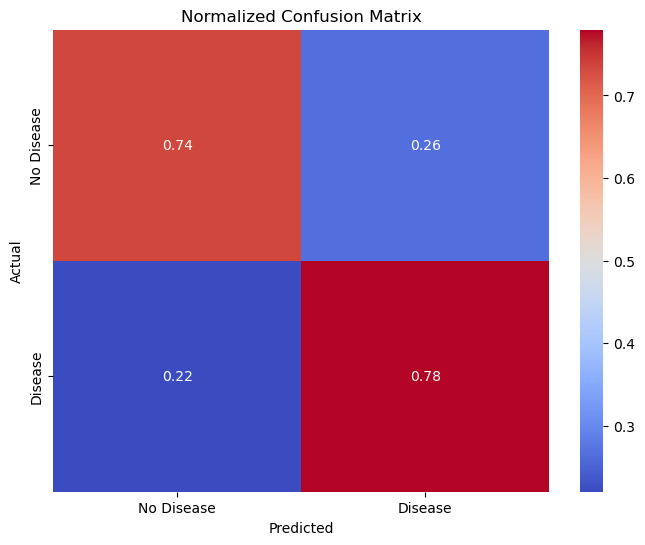

In [67]:
#New normalized confusion matrix using the new dataset
numClasses = 2

# Array set-up
conf = np.zeros([numClasses,numClasses])
newguesses = newmodel.predict(newtestdata)

# Get the number of cases for each prediction
for i in range(len(newtestlabel)):
    actual = int(newtestlabel[i])
    guess = int(newguesses[i])
    conf[actual,guess] = conf[actual,guess] + 1

# Normalization
rowsums = np.sum(conf,1)
rowsums = np.reshape(rowsums,[numClasses,1])
rowsums = np.repeat(rowsums,numClasses, axis = 1)
conf = conf / rowsums
heatm = pd.DataFrame(conf, index = ['No Disease', 'Disease'],
                  columns = ['No Disease', 'Disease'])

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatm, cmap = 'coolwarm', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

- 78% of positive cases were correctly predicted, a 68% percent increase over the first model

- 74% of negative cases were correctly predicted, a 15% percent decrease over the first model

Despite the decrease in correctly predicted negative cases, the drastic improvement in prediction of positive cases is more important for medical data, indicating that this model performs far better than the first logistic regressor.

## Further Comparisons

In [71]:
# Print the TN, FP, FN, and TP of the first model
tn1, fp1, fn1, tp1 = confusion_matrix(testlabels, guesses).ravel()
print("# of True Negatives in the first model: ", tn1)
print("# of False Positives in the first model: ", fp1)
print("# of False Negatives in the first model: ", fn1)
print("# of True Positives in the first model: ", tp1)

# of True Negatives in the first model:  68232
# of False Positives in the first model:  704
# of False Negatives in the first model:  6441
# of True Positives in the first model:  727


In [73]:
# Print the TN, FP, FN, and TP of the second model
tn2, fp2, fn2, tp2 = confusion_matrix(newtestlabel, newguesses).ravel()
print("# of True Negatives in the second model: ", tn2)
print("# of False Positives in the second model: ", fp2)
print("# of False Negatives in the second model: ", fn2)
print("# of True Positives in the second model: ", tp2)

# of True Negatives in the second model:  156628
# of False Positives in the second model:  56434
# of False Negatives in the second model:  1580
# of True Positives in the second model:  5588


In [75]:
# Print the recall scores of the first and second model
recall = recall_score(testlabels, guesses)
newrecall = recall_score(newtestlabel, newguesses)

print("First Model Recall Score: ", recall)
print("Second Model Recall Score: ", newrecall)

First Model Recall Score:  0.10142299107142858
Second Model Recall Score:  0.7795758928571429


- Near equal number of total positives cases in both models

- Significant increase in the number of true positives
  
- Significant decrease in the number of false negatives
  
- Drastic improvement in the recall score
  
- Increase in the number of false positives, inflated by the increase number of 0 labels in the test data in model 2 compared to model 1

The recall score is a valuable metric to look at, as it shows the number of correct predicted positive cases out of the total number of positive cases. The higher this is, the more disease will be caught, which is the most important metric to look at when analyzing medical data. While there is an increase in false positives, the difference is partially inflated by the significantly higher amount of data labeled with 0, as well as that false positives are not as dangerous as false negatives.

## ROC Curve


In [79]:
# Calculate the probability of the old and new test data
newprobs = newmodel.predict_proba(newtestdata)[:, 1]
probs = model.predict_proba(testdata)[:, 1]

In [81]:
# Calcuate the True Positive and False Positive rates for the baseline and model
fprbase, tprbase, _ = roc_curve(newtestlabel, [1 for _ in range(len(newtestlabel))])
fprmodel, tprmodel, _ = roc_curve(newtestlabel, newprobs)

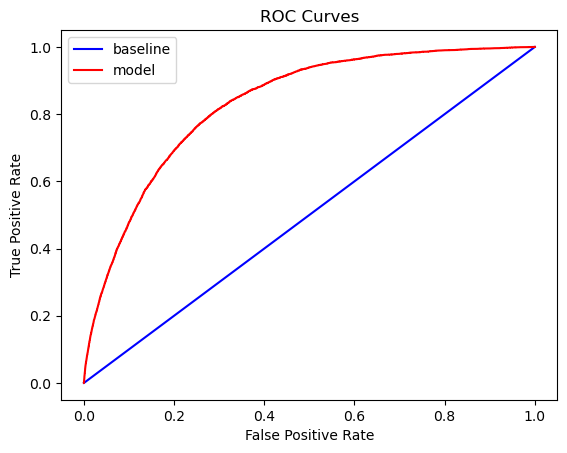

In [83]:
# Plot the ROC curve for the second model
plt.plot(fprbase, tprbase, 'b', label = 'baseline')
plt.plot(fprmodel, tprmodel, 'r', label = 'model')
plt.legend();
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [85]:
# Print the ROC scores for both models
roc1 = roc_auc_score(testlabels, probs)
roc2 = roc_auc_score(newtestlabel, newprobs)
print("ROC Score for the first model: ", roc1)
print("ROC Score for the second model: ", roc2)

ROC Score for the first model:  0.8316823815506541
ROC Score for the second model:  0.8321151382374488


## Results

The model performance indicates that machine learning techniques can effectively predict heart disease risk. When not accounting for imbalanced labels, we end up with a model that makes too many false negative predictions to be a reliable model due to the dangers of false negatives in medicine. However, when accounting for imbalanced labels via undersampling, we lose some accuracy for far better performance in predicting disease, drastically increasing the recall score along with an impressive ROC score. This model has definite room for improvement however, as there is still room for improved accuracy and lower false negatives
